**Name:KARAN SINGH**,
**Enrollment No:23113080**,
**sub batch: EE3** 

In [16]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install networkx

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx
 
import itertools




[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
data =pd.read_csv("C:/Users/HP/Downloads/zone_roads.csv")
data.head()

,Zone_ID,Longitude,Latitude,Roads
0,P65,118.69916,31.01242,"[30037, 30039, 30161, 30160, 30037, 30039, 301..."
1,P103,118.66487,30.93962,"[30112, 30102, 30099, 30096, 30101, 30099, 300..."
2,P141,118.71013,30.92721,"[21201, 21234, 21200, 21239, 21239, 21201, 212..."
3,P58,118.82496,30.96860,"[21280, 21274, 21274, 21280]"
4,P181,118.72155,30.93852,"[21197, 21223, 21192, 21219, 21197, 21223, 211..."


In [18]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Zone_ID    193 non-null    object 
 1   Longitude  193 non-null    float64
 2   Latitude   193 non-null    float64
 3   Roads      193 non-null    object 
dtypes: float64(2), object(2)
memory usage: 6.2+ KB


(193, 4)

In [19]:
data.isnull().sum()

Zone_ID      0
Longitude    0
Latitude     0
Roads        0
dtype: int64

In [20]:
(data.isnull().sum()/(len(data)))*100
#no need for data reduction

Zone_ID      0.0
Longitude    0.0
Latitude     0.0
Roads        0.0
dtype: float64

In [21]:
data["Roads"] =data['Roads'].apply(ast.literal_eval)
#remove repeating roads
data['Roads'] = data['Roads'].apply(lambda x: list(set(x)))


In [22]:
 
data['num_roads'] = data['Roads'].apply(len)

print(data[['Zone_ID', 'num_roads']].head())
 


  Zone_ID  num_roads
0     P65          4
1    P103          5
2    P141          4
3     P58          2
4    P181          4


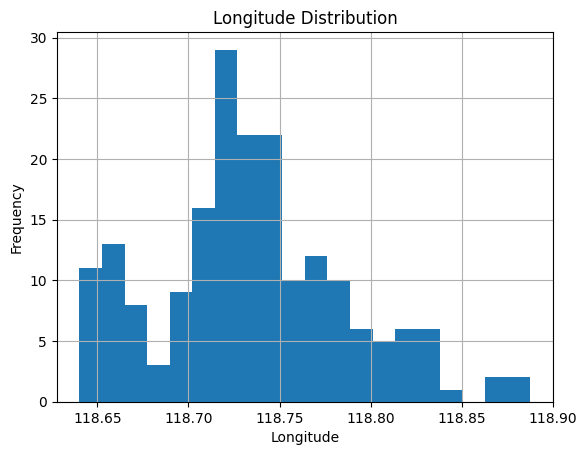

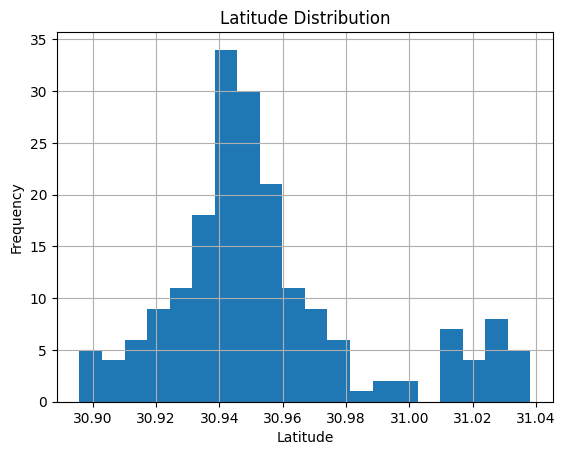

In [23]:
data['Longitude'].hist(bins=20)
plt.title('Longitude Distribution')
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.show()

data['Latitude'].hist(bins=20)
plt.title('Latitude Distribution')
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.show()

count    193.000000
mean       4.108808
std        2.396520
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max       21.000000
Name: num_roads, dtype: float64


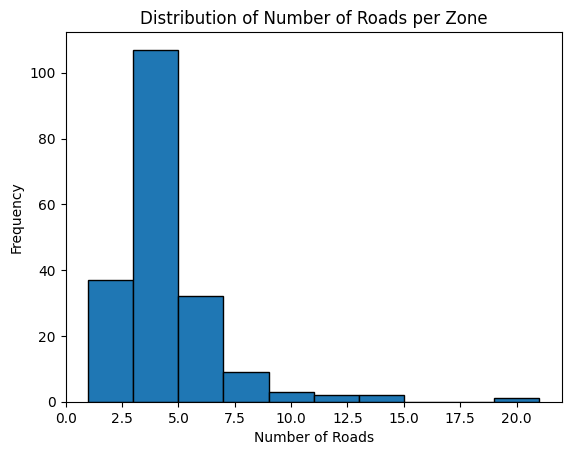

In [24]:
print(data['num_roads'].describe())

plt.hist(data['num_roads'], bins=10, edgecolor='k')
plt.title('Distribution of Number of Roads per Zone')
plt.xlabel('Number of Roads')
plt.ylabel('Frequency')
plt.show()


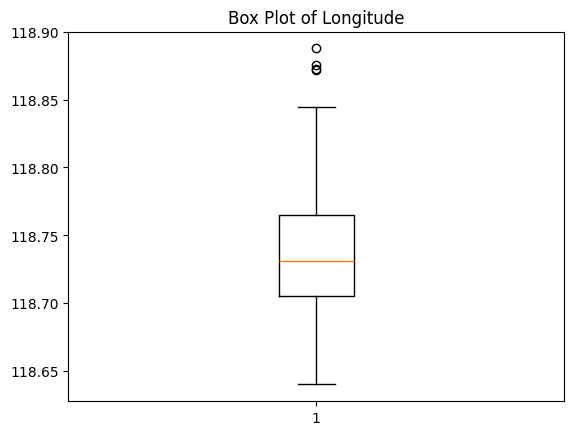

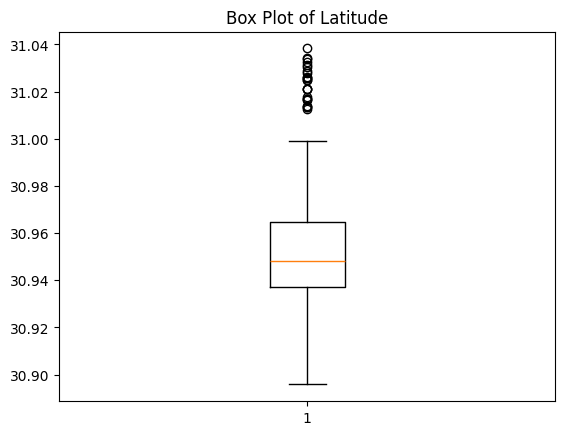

In [25]:
 
# Box Plots
plt.boxplot(data['Longitude'])
plt.title('Box Plot of Longitude')
plt.show()

plt.boxplot(data['Latitude'])
plt.title('Box Plot of Latitude')
plt.show()


           Longitude  Latitude  num_roads
Longitude   1.000000 -0.130558  -0.157025
Latitude   -0.130558  1.000000  -0.015766
num_roads  -0.157025 -0.015766   1.000000


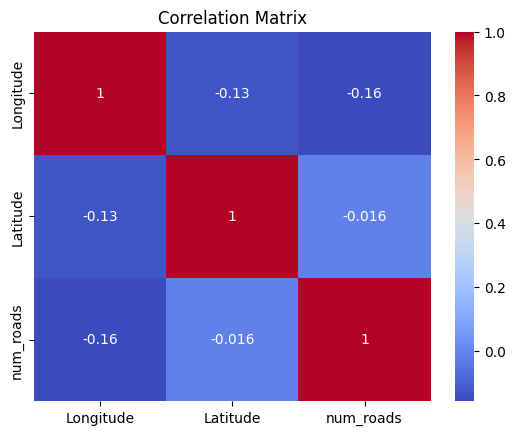

In [26]:
corr_matrix = data[['Longitude', 'Latitude', 'num_roads']].corr()
print(corr_matrix)

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


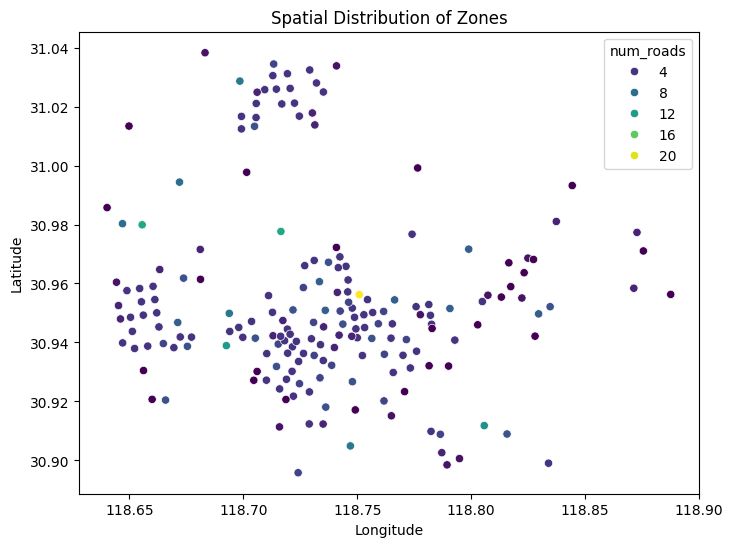

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Longitude', y='Latitude', data=data, hue='num_roads', palette='viridis')
plt.title('Spatial Distribution of Zones')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


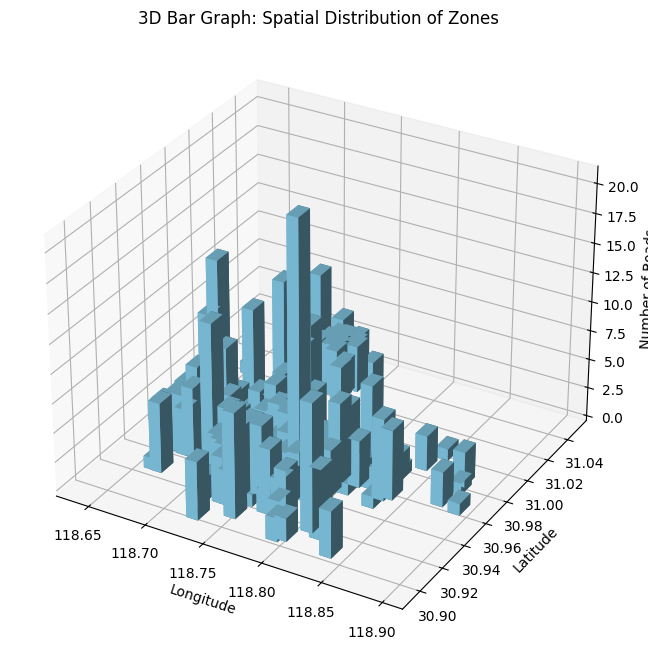

In [28]:
 
dx = 0.01  # width of each bar along the x-axis (Longitude)
dy = 0.01  # depth of each bar along the y-axis (Latitude)

# Extract data for plotting
x = data['Longitude'].values
y = data['Latitude'].values
z = np.zeros(len(data))  # All bars start at 0 on the z-axis
dz = data['num_roads'].values  # Height of each bar

# Create the figure and a 3D axis
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D bars
ax.bar3d(x, y, z, dx, dy, dz, color='skyblue', shade=True)

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Number of Roads')
ax.set_title('3D Bar Graph: Spatial Distribution of Zones')

plt.show()


Zone_ID
P1      12.0
P10      5.0
P100     4.0
P101     4.0
P102     4.0
        ... 
P93      4.0
P94      3.0
P95      3.0
P97      7.0
P98      5.0
Name: num_roads, Length: 193, dtype: float64


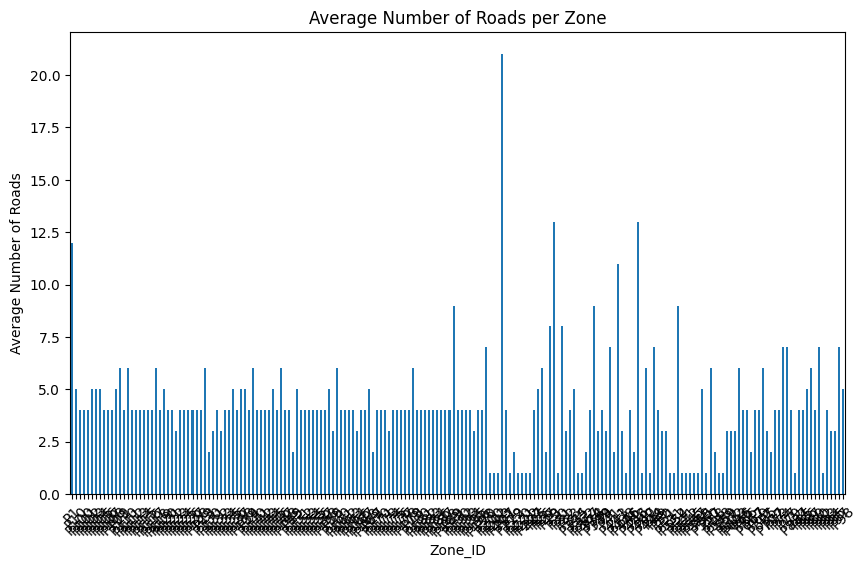

In [29]:
 
# Plotting average number of roads per zone
avg_roads_per_zone = data.groupby('Zone_ID')['num_roads'].mean()
print(avg_roads_per_zone)
avg_roads_per_zone.plot(kind='bar', figsize=(10,6))
plt.title('Average Number of Roads per Zone')
plt.xlabel('Zone_ID')
plt.ylabel('Average Number of Roads')
plt.xticks(rotation=45)
plt.show()


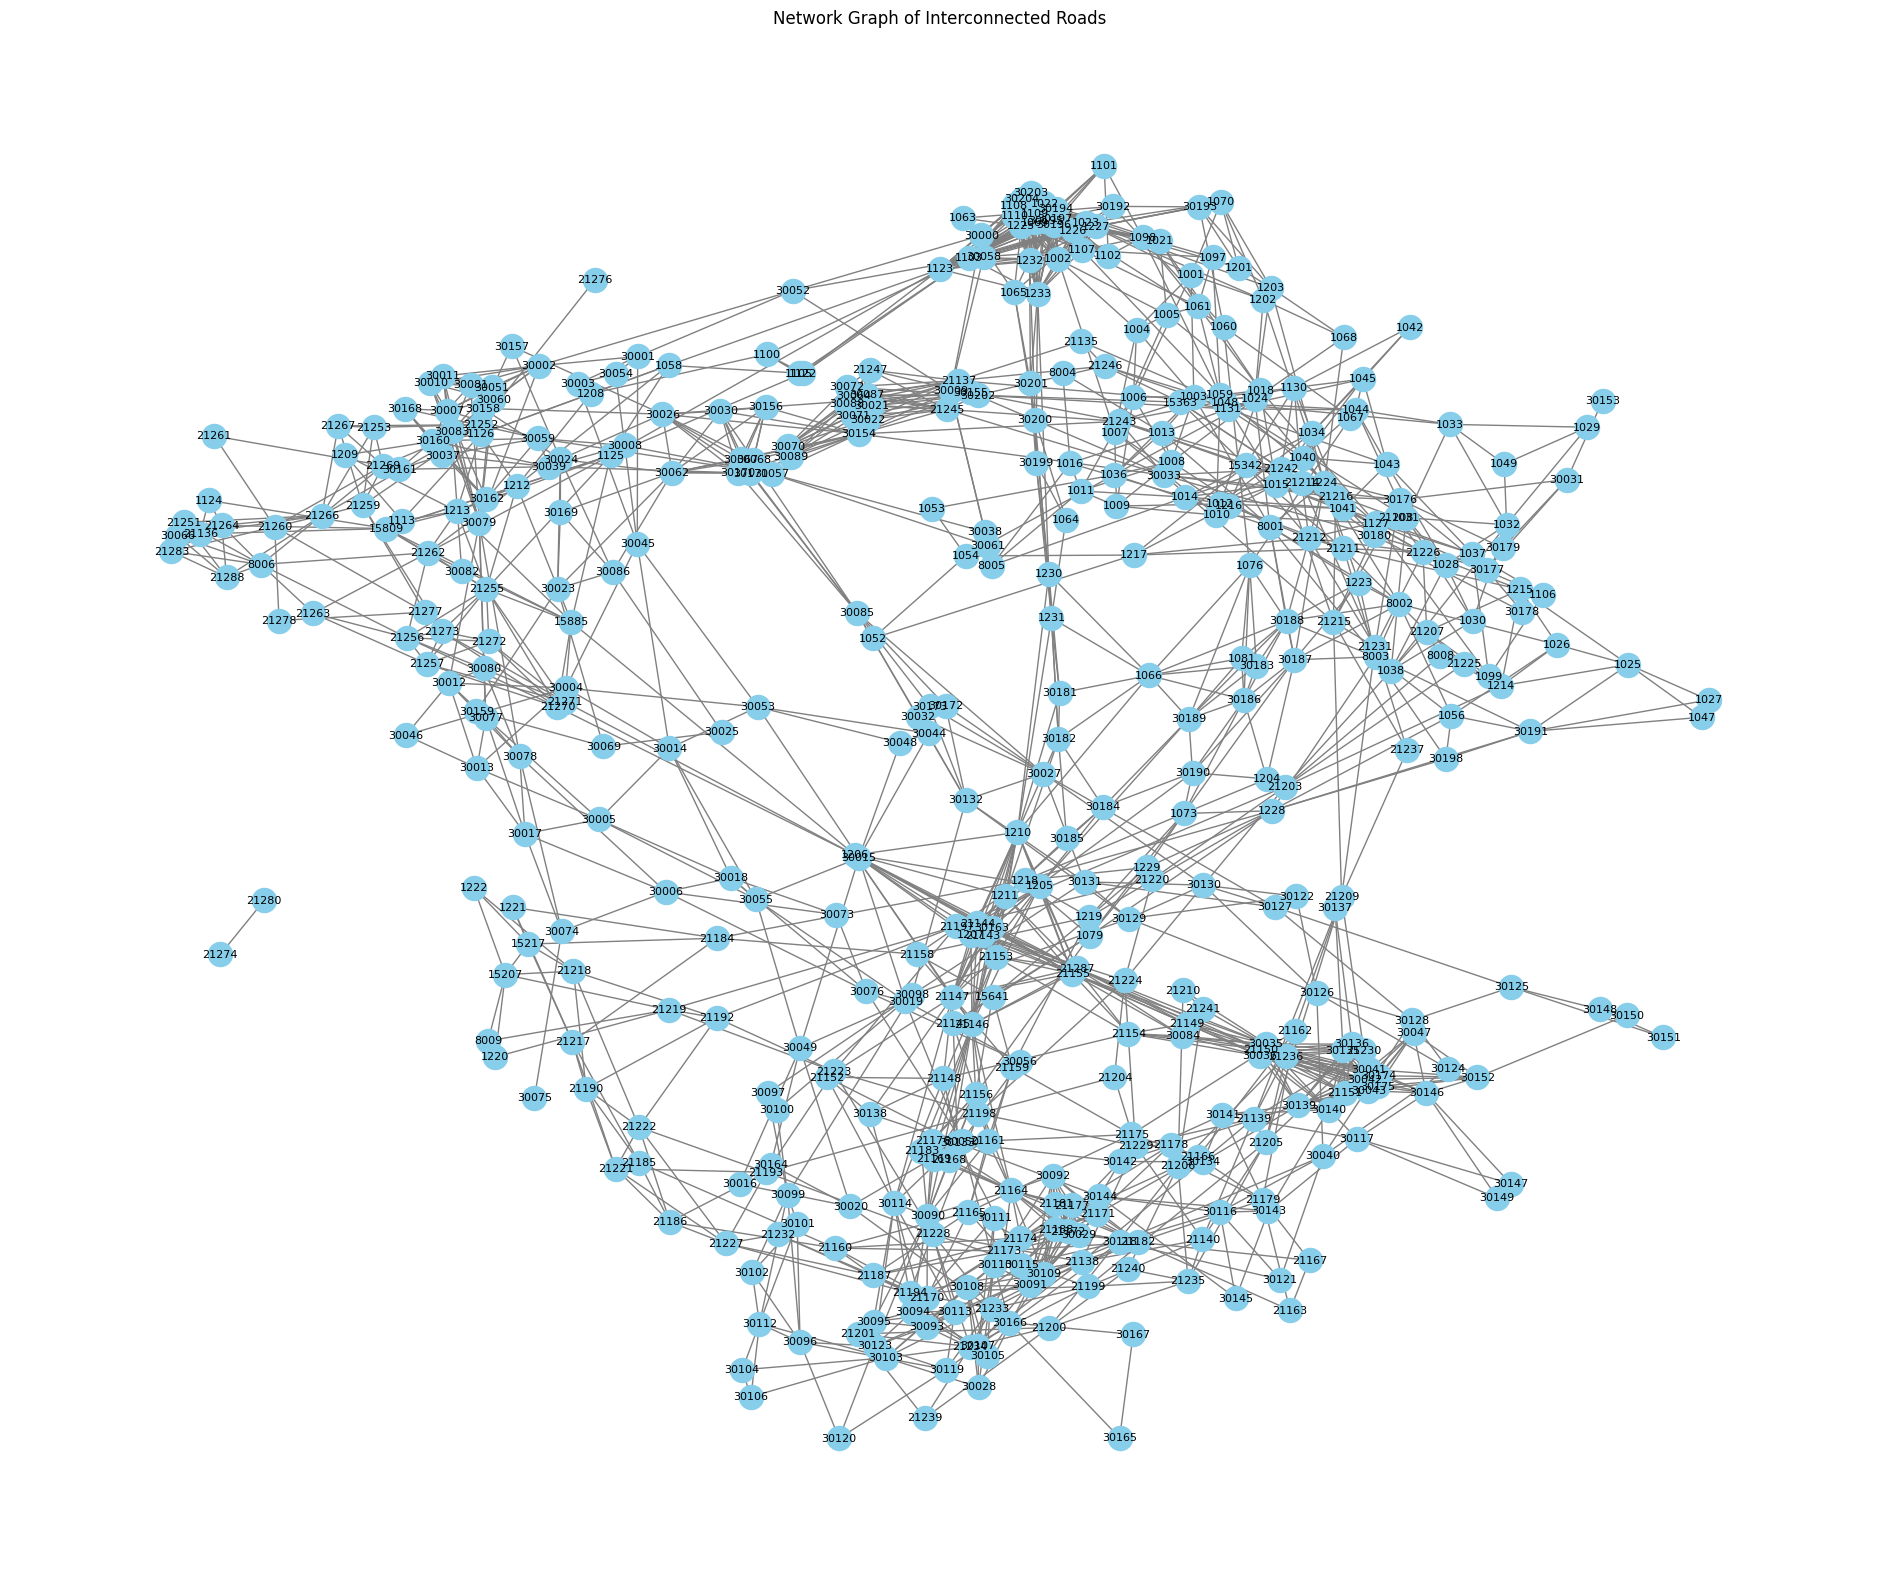

In [30]:

# Create an undirected graph
G = nx.Graph()

# For each zone, add an edge between every pair of roads
for roads in data['Roads']:
    # Generate all unique pairs of roads in the zone
    for road1, road2 in itertools.combinations(roads, 2):
        if G.has_edge(road1, road2):
            # Increase the weight if the edge already exists
            G[road1][road2]['weight'] += 1
        else:
            # Add the edge with initial weight 1
            G.add_edge(road1, road2, weight=1)

# Choose a layout for the graph (spring_layout tends to work well for small-to-medium graphs)
pos = nx.spring_layout(G, k=0.15)

# Get edge weights to use for visualizing edge thickness
weights = [G[u][v]['weight'] for u, v in G.edges()]

plt.figure(figsize=(24, 20))
# Draw nodes and edges with width proportional to edge weight
nx.draw_networkx_nodes(G, pos, node_size=300, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=[w for w in weights], edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("Network Graph of Interconnected Roads")
plt.axis('off')
plt.show()


The number of roads (i.e., the num_roads variable) in each zone gives a rough idea of how complex or interconnected a zone is. Zones with a higher count may be major hubs or central areas with more entry/exit points, while zones with fewer roads might be less central or serve smaller communities.

**Spatial Distribution and Regional Clusters:**
By mapping the roads to their average geographic coordinates (derived from the latitudes and longitudes of the zones), you can observe the spatial layout of the network. Clusters of interconnected roads in certain regions may highlight urban centers or busy districts, whereas sparser connections might indicate less congested or more peripheral areas.

**Basis for Traffic Optimization:**
These insights can serve as a foundation for urban planning and traffic management. For instance, understanding which roads serve as key connectors can help in prioritizing maintenance, planning for expansions, or designing alternative routes to alleviate congestion in critical zones